# <center>Machine Learning Lab: Exercise Sheet 4</center>
<center> <b>Submitted By: Mohit Bansal</b></center>
<center> <b>Student ID: 279314</b></center>

You are required to pre-process given Classification datasets.
* Bank Marketing: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
* Occupancy Detection: https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

## Load the data using pandas

### Bank Marketing - Data is in .csv format and we can directly load it

In [585]:
# Import Libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import math

np.seterr(all='raise')
path = '/Users/mundanemohit/Google Drive/My Work/MSc. Data Analytics/WiSe 18/3113 Machine Learning Lab/Excercises/Ex4'
os.chdir(path)

# Read Datasets
bankDF = pd.read_csv('./bank/bank.csv', sep = ';')
print("Bank Marketing:", bankDF.shape[0], "Rows x", bankDF.shape[1], "Columns")
bankDF.head()

Bank Marketing: 4521 Rows x 17 Columns


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### Occupancy Detection - Data is in a .txt file with "," seperator. Train and test files are provided seperately.

In [730]:
occuDF_train = pd.read_csv('./occupancy_data/datatraining.txt', sep = ',')
occuDF_test = pd.read_csv('./occupancy_data/datatest.txt', sep = ',')
print("Occupancy Detection (Training Set):", occuDF_train.shape[0], "Rows x", occuDF_train.shape[1], "Columns")
print("Occupancy Detection (Test Set):", occuDF_test.shape[0], "Rows x", occuDF_test.shape[1], "Columns")
occuDF_train.head()

Occupancy Detection (Training Set): 8143 Rows x 7 Columns
Occupancy Detection (Test Set): 2665 Rows x 7 Columns


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


# Exercise 0: Data Preprocessing

## Let's start with Bank Data. 

### 0.1: First, let's remove all rows with NA values

In [731]:
# Remove rows with NA values
def remove_na(df):
    print("Removing rows with NA...")
    print("Before: ", df.shape)
    df = df.dropna()
    print("After: ", df.shape)
    return df

bankDF = remove_na(bankDF)

Removing rows with NA...
Before:  (4521, 50)
After:  (4521, 50)


Seems like there were no missing values in our dataset. Let's move on,

### 0.2a: Next, we will convert all binary variables to 0 & 1

In [732]:
# Find binary columns from categorical columns

for col in bankDF.select_dtypes(include=['category', 'object']).columns:
    print(col, ":", bankDF[col].unique())

In [733]:
# Convert binary to 0 & 1
for col in ['default', 'housing', 'loan', 'y']:
    bankDF[col] = bankDF[col].map(dict(yes=1, no=0))
    
bankDF.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,bias
0,0.161765,NaN,0.068455,NaN,NaN,0.600000,0.024826,0.000000,0.000000,0.00,...,0,0,0,1,0,0,0,0,1,1
1,0.205882,NaN,0.108750,NaN,NaN,0.333333,0.071500,0.000000,0.389908,0.16,...,0,1,0,0,0,1,0,0,0,1
2,0.235294,NaN,0.062590,NaN,NaN,0.500000,0.059914,0.000000,0.379587,0.04,...,0,0,0,0,0,1,0,0,0,1
3,0.161765,NaN,0.064281,NaN,NaN,0.066667,0.064548,0.061224,0.000000,0.00,...,0,0,0,0,0,0,0,0,1,1
4,0.588235,NaN,0.044469,NaN,NaN,0.133333,0.073486,0.000000,0.000000,0.00,...,0,1,0,0,0,0,0,0,1,1


As we can see, the binary columns have been converted to 1 & 0 corresponding to Yes & No respectively.

### 0.2b: Rest of the categorical variables will be one-hot encoded

In [734]:
bankDF = pd.get_dummies(bankDF)
bankDF.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,bias
count,4521.000000,0.0,4521.000000,0.0,0.0,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,...,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.0
mean,0.326031,NaN,0.063565,NaN,NaN,0.497176,0.086051,0.036605,0.046751,0.021703,...,0.010838,0.309224,0.086043,0.017695,0.011502,0.108383,0.043574,0.028534,0.819509,1.0
std,0.155533,NaN,0.040397,NaN,NaN,0.274922,0.086017,0.063465,0.114818,0.067742,...,0.103553,0.462225,0.280458,0.131856,0.106640,0.310898,0.204169,0.166510,0.384638,0.0
min,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.205882,NaN,0.045395,NaN,NaN,0.266667,0.033102,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
50%,0.294118,NaN,0.050429,NaN,NaN,0.500000,0.059914,0.020408,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
75%,0.441176,NaN,0.064335,NaN,NaN,0.666667,0.107580,0.040816,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
max,1.000000,NaN,1.000000,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


Now our dataset has 49 columns instead of the 17 we started with.

### 0.2c: Normalize numeric columns

Next, to ensure that the sigmoid function does not overflow/ underflow due to large $\hat{y}$ values, we will use min-max normalization to bring all columns between the range of [0,1] 

In [735]:
# Normalize numeric columns
for col in ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']:
    bankDF[col] = (bankDF[col] -bankDF[col].min())/(bankDF[col].max() - bankDF[col].min())
    
bankDF.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,bias
0,0.161765,NaN,0.068455,NaN,NaN,0.600000,0.024826,0.000000,0.000000,0.00,...,0,0,0,1,0,0,0,0,1,1
1,0.205882,NaN,0.108750,NaN,NaN,0.333333,0.071500,0.000000,0.389908,0.16,...,0,1,0,0,0,1,0,0,0,1
2,0.235294,NaN,0.062590,NaN,NaN,0.500000,0.059914,0.000000,0.379587,0.04,...,0,0,0,0,0,1,0,0,0,1
3,0.161765,NaN,0.064281,NaN,NaN,0.066667,0.064548,0.061224,0.000000,0.00,...,0,0,0,0,0,0,0,0,1,1
4,0.588235,NaN,0.044469,NaN,NaN,0.133333,0.073486,0.000000,0.000000,0.00,...,0,1,0,0,0,0,0,0,1,1


### 0.3: Finally, we will split the dataset into train & test

In [736]:
# Add bias column
bankDF["bias"] = 1

# Divide data into test & train sets
bankDF_train= bankDF.sample(frac=0.8,random_state=200)
bankDF_test = bankDF.drop(bankDF_train.index)

print("Bank Dataset ----> Train Set:", len(bankDF_train), "    Test Set: ", len(bankDF_test))

Bank Dataset ----> Train Set: 3617     Test Set:  904


**Upon visual analysis, we see that Occupancy dataset does not have any categorical variables (except date). Also, it is already divided into train and test set. So let's just remove missing values & normalize.**

In [737]:
# Remove rows with NA values
occuDF_train = remove_na(occuDF_train)
occuDF_test = remove_na(occuDF_test)

# Drop date column as it cannot be used for regression
occuDF_train = occuDF_train.drop(columns = 'date')
occuDF_test = occuDF_test.drop(columns = 'date')

# Normalize numeric columns
for col in ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']:
    occuDF_train[col] = ((occuDF_train[col] - occuDF_train[col].min()) /  
                            (occuDF_train[col].max() - occuDF_train[col].min()))
    occuDF_test[col] = ((occuDF_test[col] - occuDF_test[col].min())/ 
                            (occuDF_test[col].max() - occuDF_test[col].min()))
    
occuDF_train.head()

Removing rows with NA...
Before:  (8143, 7)
After:  (8143, 7)
Removing rows with NA...
Before:  (2665, 7)
After:  (2665, 7)


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,1.000000,0.470533,0.275490,0.190933,0.557318,1
2,0.992823,0.470332,0.277754,0.186446,0.554807,1
3,0.992823,0.469326,0.275490,0.186136,0.553761,1
4,0.992823,0.467315,0.275490,0.182887,0.551669,1
5,0.980861,0.467315,0.275490,0.180566,0.547851,1


So, there are no missing values in the dataset.

# Exercise 1: Linear Classification with Stochastic Gradient Descend

### For each dataset given above
* #### Linear Regression model is given as $\hat{y^n}$ = $σ(β^T, x^n)$
* #### Where σ = ${1/{1+e^{−β^Tx^n}}}$
* #### Optimize the loglikelihood function $l(x, y)$ using Gradient Descent algorithm
* #### Implement (log-regSGA/SGD and SGA/SGD algorithms). Choose $i_{max}$ between 100 to 1000
* #### You will use step-length bolddriver for step length controller
* #### In each iteration of the SGA/SGD algorithm calculate $|f(x_i−1) − f(x_i)|$ 
    - Plot it against iteration number $i$
    - Explain the graph
* #### In each iteration step also calculate logloss on test set
    - Plot it against iteration number $i$
    - Explain the graph
    
### Solution:

The algorithm for **log-regSGA** will be as follows:

* Initialize $β^{M}$ = [1, 1, ..... 1]
* Initialize $α_0$ 
* For each iteration $i$:
    + For each $k = [1, 2, 3.... N]$:
        + Pick a random instance $x_{k}$, where $k ∼ x ← $$\mathcal{N}(μ,σ)$
        + Calculate $\hat{y_k}$ = $σ(β^T, X_k)$ = $\frac{1}{1+e^{−β^TX_k}}$
        + Calculate $β_{new} = β_{old} + α.X^T_k(y_k - \hat{y_k})$             
    + Calculate $logLoss$ on test set:
        + $L$ = $-Y.log(\hat{Y}).T - (1-Y).(log(1-\hat{Y}).T$
    + Calculate $|f(x_i−1) − f(x_i)|$
    + Update learning rate $α_{new}$ = **steplength-bolddriver**$(X, y, α, β,$ $α^+$, $α^-$)

### Sigmoid & Loss functions

In [594]:
# Define sigmoid function to predict y
def sigmoid(X_k, beta):
    y_n = np.dot(beta, X_k.T)
    p = 1 / (1 + np.exp(-y_n))
    return p

# Define logloss function
def logloss(y, p):
  return np.abs(- y * np.log(p).T) - ((1 - y) * np.log(1 - p).T)

### Bold-Driver function

Bold-driver algorithm is as follows:

For each iteration $i$:
+ Calculate $L_{i}$ 
+ If $L_{i}$ < $L_{i-1}$
    + $α$ = $α.α^+$
+ Else
    + $α$ = $α.α^-$ 

In [699]:
# Bold-driver 
def bolddriver_update(y, y_hat_old, y_hat_new, alpha, inc = 1.1, dec = 0.5): 
    y = np.matrix(y)
    
    # Compare difference between old & new error values
    if logloss(y, y_hat_new)[0,0] < logloss(y, y_hat_old)[0,0] * 0.999:
        alpha = alpha * inc
    else:
        alpha = alpha * dec  
    return alpha

<a id='LinReg'></a>

### Stochastic Gradient Descent Function

#### We initialized betas to small values of 0.1 to avoid overflow/underflow of the sigmoid/logloss functions in the first iteration

In [700]:
def learn_stoc_logreg(X, y, Xtest, ytest, iterations = 100, alpha = 0.1, inc = 1.1, dec = 0.5, stepControl = None):
    ytest = np.matrix(ytest)
    
    # Initialize betas to small initial values
    beta = np.matrix([0.1] * X.shape[1])
    Resid, logL, alp = [], [], []

    # Calculate initial y hat on test set (for graphs)
    ytest_hat_prev = sigmoid(Xtest, beta)    
    L = logloss(ytest, ytest_hat_prev)
    logL.append(L)
    
    # Calculate initial y hat on train set (for bold-driver)
    y_hat = sigmoid(X, beta)    
    
    # Initialize gradient history (for adagrad)
    h = np.matrix([1] * X.shape[1])

    
    for iter in range(iterations):
        
        for k in range(len(X)):
            X_k = X.sample(1, axis=0)
            y_k = y.loc[X_k.index[0]]
        
            # Calculate y hat
            y_hat_k = sigmoid(X_k, beta)[0,0]
            dfx = X_k * (y_k - y_hat_k)
            
            # Update history for adagrad
            if stepControl == 'AdaGrad':
                h = adagradupdate(h, dfx)
            
            # Update betas
            try:
                beta = beta + (np.array(alpha/np.sqrt(h)) * np.array(dfx))                
            except:
                    print("alpha converged after iteration #", k)
                    break              
        ## End of inner loop
        try:
            # Calculate log-loss error on test set
            ytest_hat = sigmoid(Xtest, beta)
            L = logloss(ytest, ytest_hat)[0,0]
            logL.append(L)            
            
            # Calculate residuals on test set
            Err = np.abs(logL[-1] - logL[-2])
            ytest_hat_prev = ytest_hat
            Resid.append(Err)     
        except:
            print("Function diverged after iteration #", iter)
            break          
    
        # Update learning rate using bold-driver
        if stepControl == 'Bold-Driver':
            y_hat_new = sigmoid(X, beta)
            alpha = bolddriver_update(y, y_hat, y_hat_new, alpha, inc, dec)
            y_hat = y_hat_new
        alp.append(alpha)
    return Resid, logL, alp

### Plotting Function

In [701]:
'def pred_plot(Residuals, RMSE, alpha, title):
    fig = plt.figure(figsize=(15, 5))
    fig.suptitle(title, fontsize=20)
    fig.add_subplot(1,2,1)
    plt.title("Logloss Value on test-set")
    plt.plot(RMSE)
    plt.xlabel("Iterations")
    
    fig.add_subplot(1,2,2)
    plt.plot(Residuals,  color = 'Orange')
    plt.xlabel("Iterations")
    plt.title("|f(x) - f(x−1)| for test-set")
    plt.show()'

### Testing SGD with & without bold-driver step-length controller (starting alpha = 0.01)

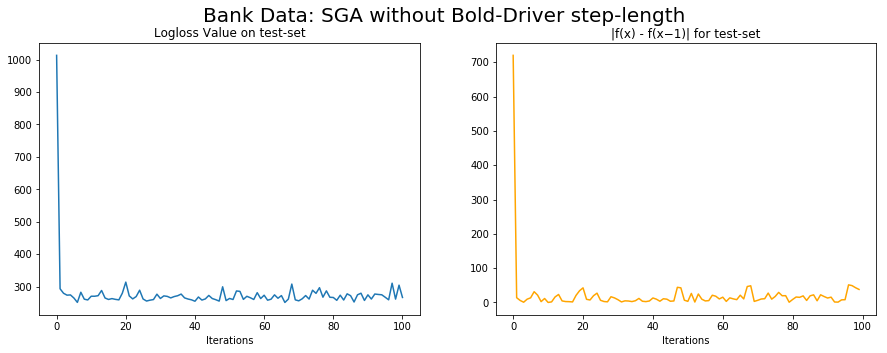

In [702]:
X = bankDF_train.loc[:, bankDF_train.columns != 'y']
y = bankDF_train['y']
Xtest = bankDF_test.loc[:, bankDF_test.columns != 'y']
ytest = bankDF_test['y']
alpha = 0.1

# Without bold-driver
Residuals_bank, LogLoss_bank, alp  = learn_stoc_logreg(X, y, Xtest, ytest, 
                                                       iterations = 100, alpha = alpha)
pred_plot(Residuals_bank, LogLoss_bank, alpha, 
          title = "Bank Data: SGA without Bold-Driver step-length")

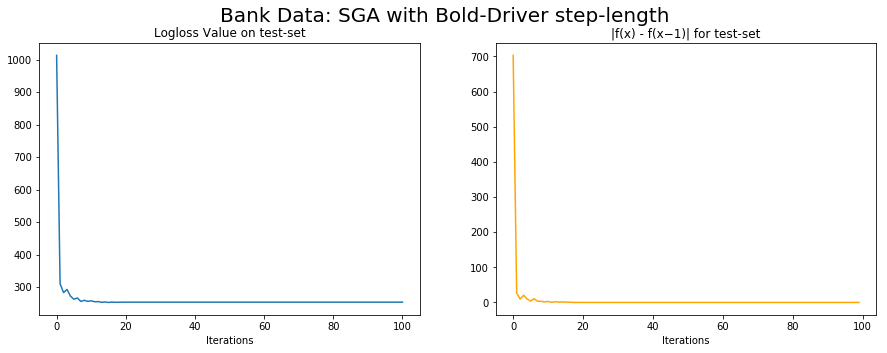

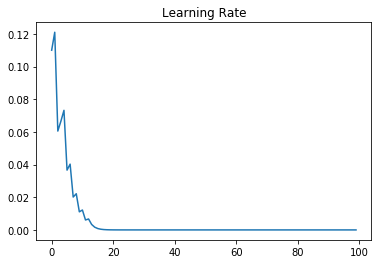

In [703]:
# With bold-driver
Residuals_bank_bd, LogLoss_bank_bd, alp  = learn_stoc_logreg(X, y, Xtest, ytest, 
                                                            iterations = 100, alpha = alpha, 
                                                             inc = 1.1, dec = 0.5, 
                                                             stepControl = 'Bold-Driver')
pred_plot(Residuals_bank_bd, LogLoss_bank_bd, alpha, 
          title = "Bank Data: SGA with Bold-Driver step-length")

# Plot alpha values to see how bold-driver update works
plt.plot(alp)
plt.title("Learning Rate")
plt.show()

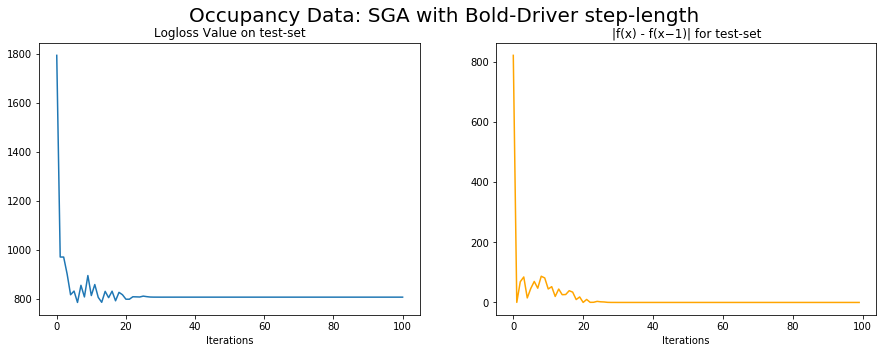

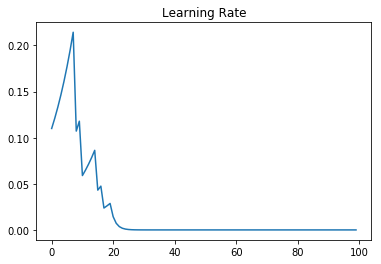

In [704]:
X = occuDF_train.loc[:, occuDF_train.columns != 'Occupancy']
y = occuDF_train['Occupancy']
Xtest = occuDF_test.loc[:, occuDF_test.columns != 'Occupancy']
ytest = occuDF_test['Occupancy']
alpha = 0.1

# With bold-driver
Residuals_occ_bd, LogLoss_occ_bd, alp  = learn_stoc_logreg(X, y, Xtest, ytest, 
                                                           iterations = 100, alpha = alpha, 
                                                           inc = 1.1, dec = 0.5, 
                                                           stepControl = 'Bold-Driver')
pred_plot(Residuals_occ_bd, LogLoss_occ_bd, alpha, 
          title = "Occupancy Data: SGA with Bold-Driver step-length")

# Plot alpha values to see how bold-driver update works
plt.plot(alp)
plt.title("Learning Rate")
plt.show()

**BANK DATASET**

So, we can see that bold-driver leads to convergence within less than 10 epochs after which the learning rate becomes very small. Our final log-loss value is somewhere around 150 for the banking dataset.

Also, without any step-control, the graph moves erratically when it reaches a local minima. The loss function is much smoother with step-control since the learn rate becomes smaller as we reach closer to local minima.

$|f(x_i−1) − f(x_i)|$ graph shows us that there was a great improvement in the loss in the first iteration, after which the improvements were relatively small.

**OCCUPANCY DATASET**

Here, the Loss reaches a minima at around $5^{th}$ epoch, but since the learning rate is high at that point, it moves out of minima and converges at around the $25^{th}$ epoch. This may be due to wrong choice of learning rate in the beginning.

These graphs also tell us that generally, we do not need to optimize a function for more than 10 epochs.

# Exercise 2: Implement AdaGrad for adaptive step length

* #### This task you have to implement AdaGrad algorithms given in the lecture slides
* #### In each iteration of the SGA/SGD algorithm calculate $|f(x_i−1) − f(x_i)|$ 
    - Plot it against iteration number $i$
    - Explain the graph
* #### In each iteration step also calculate logloss on test set
    - Plot it against iteration number $i$
    - Explain the graph
* Compare **AdaGrad** with **steplengthbolddriver** algorithm

### Solution

The algorithm for adagrad is as follows:

For each iteration $i$:
+ $h$ = 0
+ For each $k = [1, 2, 3.... N]$:
    + $\delta{L_k}$ = $X_k (y_k - \hat{y_k})$
    + $h = h + diag$($\delta{L_{k}}$.$\delta{L^T_{k}}$)
    + $momentum$ = $\frac{α}{\sqrt{h}}$
    + $β_{new}$ = $β_{old}$ + $momentum$ . $X^T_k(y_k - \hat{y_k})$ 

Adagrad historical momentum update is defined below
We have implemented this algorithm into the [Linear Regression](#LinReg) function.

In [705]:
def adagradupdate(h, dfx):
    dfx = np.matrix(dfx)
    return h + np.diag(dfx.T * dfx)

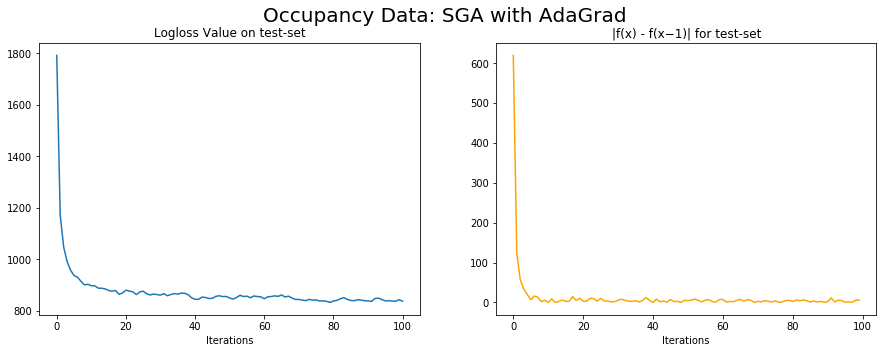

In [706]:
# Occupancy-data With adagrad
Residuals_occ_ada, LogLoss_occ_ada, alp  = learn_stoc_logreg(X, y, Xtest, ytest, 
                                                             iterations = 100, alpha = 0.1, 
                                                             stepControl = 'AdaGrad')
pred_plot(Residuals_occ_ada, LogLoss_occ_ada, alpha, title = "Occupancy Data: SGA with AdaGrad")

With AdaGrad on Occupancy data, the function converges slower however the updates are much smoother. Again, much of the heavy lifting is done in the first few epochs.

However, we started with a learning rate of 0.1. Let's increase the learning rate to 0.5 for the banking dataset

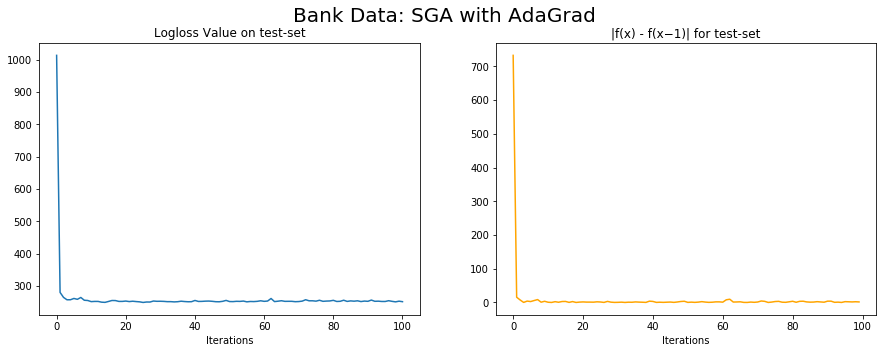

In [707]:
X = bankDF_train.loc[:, bankDF_train.columns != 'y']
y = bankDF_train['y']
Xtest = bankDF_test.loc[:, bankDF_test.columns != 'y']
ytest = bankDF_test['y']

# bank data With adagrad
Residuals_bank_ada, LogLoss_bank_ada, alp  = learn_stoc_logreg(X, y, Xtest, ytest, 
                                                               iterations = 100, alpha = 0.5, 
                                                               stepControl = 'AdaGrad')
pred_plot(Residuals_bank_ada, LogLoss_bank_ada, alpha, title = "Bank Data: SGA with AdaGrad")

Here, we see a much better performance and the SGD seems to have converged much faster.

Let's compare the performances of Ada-Grad and Bold-Driver on both the datasets.

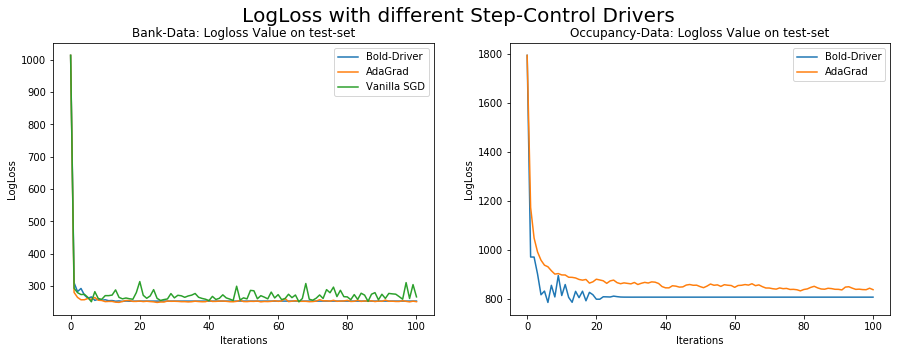

In [721]:
fig = plt.figure(figsize=(15, 5))
fig.suptitle("LogLoss with different Step-Control Drivers", fontsize=20)

# Bank-data
fig.add_subplot(1,2,1)
plt.title("Bank-Data: Logloss Value on test-set")
plt.plot(LogLoss_bank_bd)
plt.plot(LogLoss_bank_ada)
plt.plot(LogLoss_bank)
plt.legend(['Bold-Driver', 'AdaGrad', 'Vanilla SGD'])
plt.xlabel('Iterations')
plt.ylabel('LogLoss')
#plt.show()

# Occupancy-data
fig.add_subplot(1,2,2)
plt.title("Occupancy-Data: Logloss Value on test-set")
plt.plot(LogLoss_occ_bd)
plt.plot(LogLoss_occ_ada)
plt.legend(['Bold-Driver', 'AdaGrad'])
plt.xlabel('Iterations')
plt.ylabel('LogLoss')
plt.show()

#### Bank Data:

<p>So, we can see that <span style="color:orange"> Adagrad </span> outperforms <span style="color:blue"> Bold-Driver </span> on the bank data because it converges a few iterations before. However, the end result is the similar using both techniques. Both the controls outperform the unregulated <span style="color:green">Vanilla SGD. </span> </p>

#### Occupancy Data

<p> Here, <span style="color:blue"> Bold-Driver </span>  seems to have performed better than <span style="color:orange"> Adagrad. </span> However, it was still a bit unstable in the beginning which proves that Ada-Grad is more reliable. 
    
Adagrad is also less sensitive to the choice of initial alpha as compared to bold-driver. Moreover, updates are much smoother as it uses a history of gradients for controlling step-size rather than just using the last one.